PART 파이썬 분석

>  모의고사
> >SECTION 01 모의고사 작업형 1회
> > >**01 제1유형**

-  문제1.
 - 데이터에 대해서 결측치가 가장 많은 변수를 찾아서 해당 결측치를 0으로 대처하고,
 - 결측치를 제외한 평균과 0으로 대치한 후의 평균과의 차이를 구하시오

- 문제2.
 - Wind 변수에 대해서 Min-Max 정규화를 수행한 후 평균값과 Z 정규화를 수행한 후
 - 평균 값의 차이를 구하시오

- 문제3
 - 월별(5월~9월) 평균 기온을 구하시오

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np

# csv 파일이 위치한 디렉토리 입력
df = pd.read_csv('/content/drive/MyDrive/순천대학교/data/airquality.csv')

In [39]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [41]:
# 데이터에 대해서 결측치가 가장 많은 변수를 찾아서 해당 결측치를 0으로 대처하고,
# 결측치를 제외한 평균과 0으로 대치한 후의 평균과의 차이를 구하시오


In [42]:
# Ozone 컬럼의 결측치를 0으로 대체
# 대체 이전과 이후의 평균을 출력

# Ozone 컬럼의 결측치 개수 출력
print(df['Ozone'].isnull().sum())
# Ozone 컬럼의 평균
Ozone_mean1 = df['Ozone'].mean()

# 결측치를 평균으로 대체
df['Ozone'].fillna(0, inplace = True)

print(df['Ozone'].isnull().sum())
Ozone_mean2 = df['Ozone'].mean()

print(Ozone_mean1)
print(Ozone_mean2)

37
0
42.12931034482759
31.941176470588236


In [43]:
print(Ozone_mean1 - Ozone_mean2)

10.188133874239352


In [44]:
# Min-Max 표준화, Z 표준화 변환뒤 컬럼 추가
# 소수점 2자리까지 표시
Min = np.min(df['Wind'])
Max = np.max(df['Wind'])
# 소수점 제한 round(,2)
# 표준화된 minx_max 칼럼 추가
df['min_max'] = round((df['Wind'] - Min)/(Max - Min),2)

#Z 표준화 변환뒤 컬럼
# 평균
Mean = np.mean(df['Wind'])
# 표준편차
Std = np.std(df['Wind'])
df['z'] = round((df['Wind'] - Mean)/ Std,2)

In [45]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,min_max,z
0,41.0,190.0,7.4,67,5,1,0.30,-0.73
1,36.0,118.0,8.0,72,5,2,0.33,-0.56
2,12.0,149.0,12.6,74,5,3,0.57,0.75
3,18.0,313.0,11.5,62,5,4,0.52,0.44
4,0.0,NaN,14.3,56,5,5,0.66,1.24
...,...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,0.27,-0.87
149,0.0,145.0,13.2,77,9,27,0.61,0.92
150,14.0,191.0,14.3,75,9,28,0.66,1.24
151,18.0,131.0,8.0,76,9,29,0.33,-0.56


In [46]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day,min_max,z
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,31.941176,185.931507,9.957516,77.882353,6.993464,15.803922,0.433333,-0.000065
std,33.924497,90.058422,3.523001,9.465270,1.416522,8.864520,0.185696,1.003679
min,0.000000,7.000000,1.700000,56.000000,5.000000,1.000000,0.000000,-2.350000
25%,4.000000,115.750000,7.400000,72.000000,6.000000,8.000000,0.300000,-0.730000
50%,21.000000,205.000000,9.700000,79.000000,7.000000,16.000000,0.420000,-0.070000
75%,46.000000,258.750000,11.500000,85.000000,8.000000,23.000000,0.520000,0.440000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000,3.060000


In [47]:
min_max_mean = np.mean(df['min_max']).astype(float)
z_mean = np.mean(df['z']).astype(float)

In [48]:
print(min_max_mean - min_max_mean)

0.0


In [49]:
# min_max 평균 : 0.433333
# z 평균       :-0.000065

In [50]:
print()

In [51]:
# 월별 평균기온
# groupby
print(df.groupby('Month')['Temp'].mean())

Month
5    65.548387
6    79.100000
7    83.903226
8    83.967742
9    76.900000
Name: Temp, dtype: float64


>>>**02 제2유형**

- 은행에서 수집한 5,000명 금융정보
- 대출여부가 들어있는 참조데이터를 이용하여
- 대출 여부를 분류하는 가장 최적의 이웃의
- 크기값(k)을 구하고 이때 분류 정확도를 산출하시오

- 단, 참조데이터는 7:3의 비율로 트레이닝 / 테스트 데이터로 구분
- 트레이닝 테스트 데이터의 대출여부(y)이 비율 유지
- 또한 Z값을 산출하여 정규화한다

In [52]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

cur_dir = '/content/drive/MyDrive/순천대학교/data/'       # 현재 디렉토리 입력
ploan = pd.read_csv(cur_dir + 'Bank_Personal_Loan_Modelling.csv')

In [53]:
ploan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [54]:
# 데이터 차원 확인
ploan.shape

(5000, 14)

In [55]:
# 데이터 예시 확인
ploan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [56]:
# 의미없는 변수 제거 + NaN 관측치 제거
# ID, Zip Code
ploan_process = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace = False)

In [57]:
ploan_process

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [58]:
## 문제 답지

In [59]:
# ploan_processe의 독립변수(문제)와 종속변수(답지)를 나눠 저장
X = ploan_process.drop(['Personal Loan'], axis=1) # 문제
y = ploan_process['Personal Loan'] # 답지
# 대출여부: 1 or 0

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [61]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Personal Loan
Non-Null Count  Dtype
--------------  -----
5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


In [66]:
ploan_process.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [62]:
from sklearn.model_selection import train_test_split

# personal Loan으로 학습 데이터와 테스트 데이터로 나누기(7:3)
# 종속변수인 Personal Loan(대출여부)의 범주간 비율 차이가 크기 때문에
#train_test_split() 함수의 stratify(계층샘플)에 y를 입력

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state= 42,
                                                 stratify=y)

In [63]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [65]:
# 전처리 수행하는 sklearn의 패키지를 불러온다.
# 정규화 수행 과정
import sklearn.preprocessing as preprocessing
preprocessor = preprocessing.Normalizer()

In [67]:
# train, test 문제 데이터 정규화
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [72]:
X_train[:10]

array([[0.49045878, 0.20870587, 0.84525876, 0.01043529, 0.02786223,
        0.02087059, 0.        , 0.        , 0.        , 0.01043529,
        0.        ],
       [0.77553395, 0.39568059, 0.49064393, 0.01582722, 0.01582722,
        0.01582722, 0.        , 0.01582722, 0.        , 0.01582722,
        0.        ],
       [0.61314191, 0.33941784, 0.71168258, 0.02189793, 0.04051116,
        0.01094896, 0.        , 0.        , 0.        , 0.01094896,
        0.        ],
       [0.30340225, 0.14563308, 0.94054697, 0.00606804, 0.04429673,
        0.00606804, 0.        , 0.        , 0.        , 0.00606804,
        0.00606804],
       [0.5089683 , 0.15996147, 0.84343318, 0.04362585, 0.04071746,
        0.01454195, 0.        , 0.        , 0.        , 0.01454195,
        0.        ],
       [0.524708  , 0.262354  , 0.80892483, 0.03279425, 0.00765199,
        0.01093142, 0.        , 0.01093142, 0.        , 0.01093142,
        0.        ],
       [0.31152728, 0.13919304, 0.61642632, 0.01325648, 0.

In [73]:
# 모델 만들기
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []

# k값을 1 ~ 25까지 n_neighbors를 적용
neighbors_set = range(1,25)

# 반복문 작성
for n_neighbors in neighbors_set:
  # 모델 생성
  knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
  # 모델 훈련
  knn_model.fit(X_train,y_train)
  # 훈련세트(train set) 정확도 저장
  # score(문제,답지)
  train_acc.append(knn_model.score(X_train,y_train))
  # 테스트세트(test set) 정확도 저장
  test_acc.append(knn_model.score(X_test,y_test))

In [74]:
train_acc

[1.0,
 0.9525714285714286,
 0.9622857142857143,
 0.9422857142857143,
 0.9468571428571428,
 0.934,
 0.9351428571428572,
 0.9277142857142857,
 0.9317142857142857,
 0.9274285714285714,
 0.9297142857142857,
 0.9265714285714286,
 0.9277142857142857,
 0.9231428571428572,
 0.9248571428571428,
 0.9188571428571428,
 0.9228571428571428,
 0.9197142857142857,
 0.9214285714285714,
 0.9182857142857143,
 0.9217142857142857,
 0.9191428571428572,
 0.9202857142857143,
 0.9182857142857143]

In [75]:
test_acc

[0.916,
 0.9206666666666666,
 0.924,
 0.9206666666666666,
 0.9173333333333333,
 0.916,
 0.9173333333333333,
 0.9126666666666666,
 0.9126666666666666,
 0.91,
 0.9106666666666666,
 0.916,
 0.9126666666666666,
 0.91,
 0.9093333333333333,
 0.9073333333333333,
 0.906,
 0.906,
 0.908,
 0.9093333333333333,
 0.906,
 0.906,
 0.9086666666666666,
 0.908]

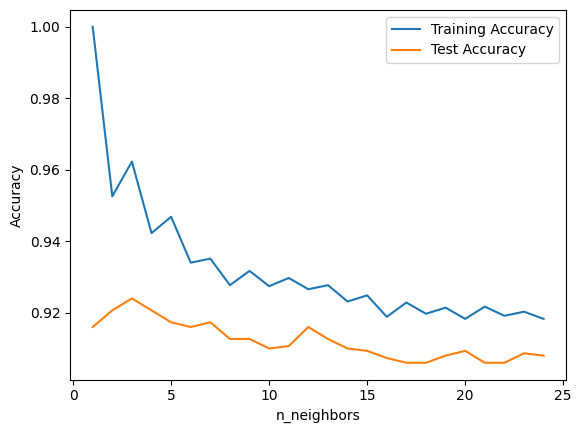

In [76]:
# K변화량에 따른 예측정확도 성능 비교 그래프로
plt.plot(neighbors_set, train_acc, label='Training Accuracy')
plt.plot(neighbors_set, test_acc, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()




In [77]:
# 최적의 이웃수 산출
test_acc

[0.916,
 0.9206666666666666,
 0.924,
 0.9206666666666666,
 0.9173333333333333,
 0.916,
 0.9173333333333333,
 0.9126666666666666,
 0.9126666666666666,
 0.91,
 0.9106666666666666,
 0.916,
 0.9126666666666666,
 0.91,
 0.9093333333333333,
 0.9073333333333333,
 0.906,
 0.906,
 0.908,
 0.9093333333333333,
 0.906,
 0.906,
 0.9086666666666666,
 0.908]

In [ ]:
# 가장 최적의 이웃 크기는 K = 3
# 분류 정확도는 92.4% 입니다